# Brine concentrations -- Hajbi et al.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json

Membrane thickness: 1.5641 (mm)
cell length (m):  0.08466666666666667
feed velocity (m/s):  1.2467918148298736
feed_cross_sectional_area (mm^2):  17155.140605256085
permeate_removal_per_cell 52.199626683094955
(Removed moles / cell) slope:  -0.6512746512499022
moles 334.34593299895596
module_previous_moles_removed 630.3031681046389
Effluent module 1 CF: 2.885182698204398
{'Aragonite': {'formula': 'CaCO3', 'mass': 103.0869}, 'Artinite': {'formula': 'Mg2CO3(OH)2:3H2O', 'mass': 149.63358}, 'Bischofite': {'formula': 'MgCl2:6H2O', 'mass': 203.30268}, 'Brucite': {'formula': 'Mg(OH)2', 'mass': 60.31968}, 'Calcite': {'formula': 'CaCO3', 'mass': 103.0869}, 'Dolomite': {'formula': 'CaMg(CO3)2', 'mass': 186.4008}, 'Gaylussite': {'formula': 'CaNa2(CO3)2:5H2O', 'mass': 296.15174}, 'Halite': {'formula': 'NaCl', 'mass': 58.44277}, 'Huntite': {'formula': 'CaMg3(CO3)

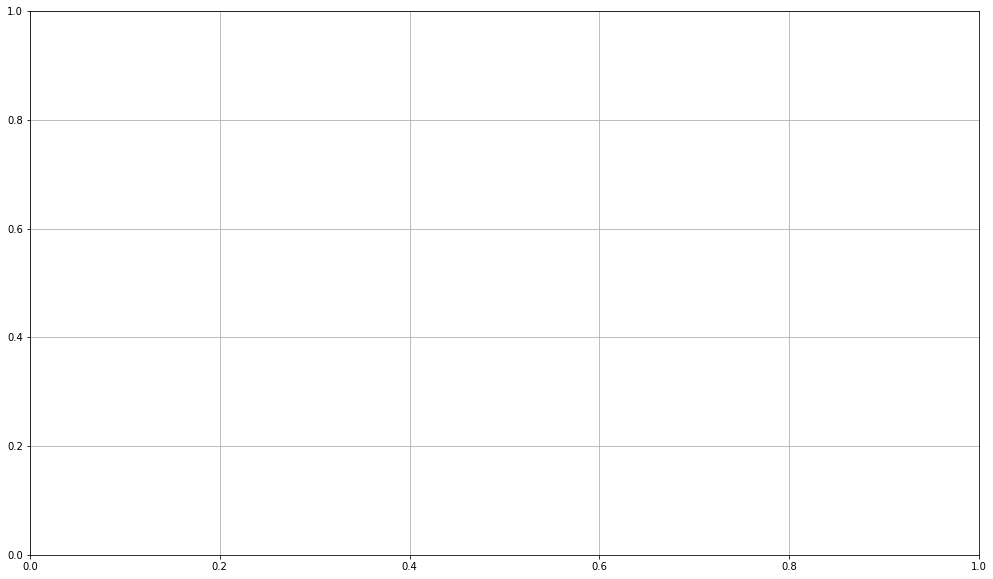

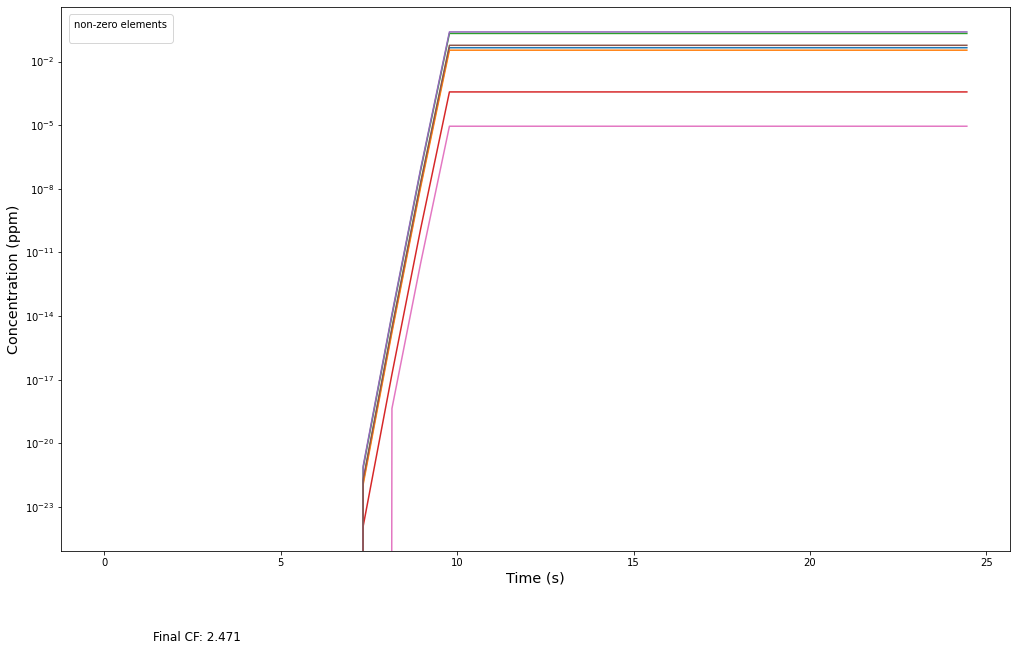

ZeroDivisionError: division by zero

In [48]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
# quantity_of_modules = 1
module_characteristics = {        
#     'module_diameter_mm': 201,
#     'permeate_tube_diameter_mm': 29,            
#     'module_length_m': 1.016,         
    'permeate_flow_m3_per_day': 1200,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
#     'membrane_thickness_mm': 250 * (nano / milli),
#     'feed_thickness_mm': 0.8636,
#     'active_m2': 37,
#     'permeate_thickness_mm':0.3,
#     'polysulfonic_layer_thickness_mm': 0.05,
#     'support_layer_thickness_mm':0.15
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
operating_system = 'windows'
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_type = 'transport'
simulation_title = 'test'
graphical_selection = output_perspective = 'brine'
simulation_time = 24


# create the input file
ross.define_general(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title)
ross.transport(simulation_time, module_characteristics, output_perspective)
ross.reaction()
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases(verbose = False)
ross.selected_output()
ross.export(print_block = False)

# ross.input_file(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title, water_selection)

# execute the input file
ross.execute(print_output = False)

# process the simulation results
ross.process_selected_output(selected_output_path, graphical_selection)

# Scaling 